In [1]:
from rthon import dnorm, pnorm, qnorm, rnorm

In [2]:
pnorm(145, 100, 15)

0.9986501019683699

In [3]:
dnorm([0,1,2], mean=1)

[0.24197072451914337, 0.3989422804014327, 0.24197072451914337]

In [8]:
pnorm(qnorm(0.95))

0.9499999999997494

In [3]:
import torch

$$ A = \begin{bmatrix}
    12 & -51 & 4 \\
    6 & 167 & -68 \\
    -5 & 24 & -41 \\
\end{bmatrix} $$

$\beta^{\hat}$

In [4]:
A = [[12,-51,4], [6,167,-68], [-4,24,-41]]
A = torch.tensor(A)
A

tensor([[ 12, -51,   4],
        [  6, 167, -68],
        [ -4,  24, -41]])

In [5]:
def proj(u, a):
    return (torch.dot(u, a) / torch.dot(u,u)) * u

In [19]:
a1 = torch.tensor(A[:,0], dtype=torch.float32)
e1 = a1 / torch.linalg.vector_norm(a1)
# print(a1)
# type(a1)

/var/folders/cv/g8dv5_b52gbgs1s_0p35wrx40000gn/T/ipykernel_48687/4140255439.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a1 = torch.tensor(A[:,0], dtype=torch.float32)


In [20]:
torch.dot(a1, e1) * e1

tensor([12.,  6., -4.])

In [24]:
a1 = torch.tensor(A[:,0], dtype=torch.float32)
a2 = torch.tensor(A[:,1], dtype=torch.float32)
a3 = torch.tensor(A[:,2], dtype=torch.float32)

u1 = a1; e1 = a1 / torch.linalg.vector_norm(a1)

u2 = a2 - proj(u1, a2); e2 = a2 / torch.linalg.vector_norm(a2)

u3 = a3 - proj(u1, a3) - proj(u2, a3); e3 = a3 / torch.linalg.vector_norm(a3)

/var/folders/cv/g8dv5_b52gbgs1s_0p35wrx40000gn/T/ipykernel_48687/3203289793.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a1 = torch.tensor(A[:,0], dtype=torch.float32)
/var/folders/cv/g8dv5_b52gbgs1s_0p35wrx40000gn/T/ipykernel_48687/3203289793.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a2 = torch.tensor(A[:,1], dtype=torch.float32)
/var/folders/cv/g8dv5_b52gbgs1s_0p35wrx40000gn/T/ipykernel_48687/3203289793.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a3 = torch.tensor(A[:,2], dtype=torch.float32)


In [25]:
an1 = torch.dot(e1, a1) * e1
an2 = torch.dot(e1, a2) * e1 + torch.dot(e2, a2) * e2
an3 = torch.dot(e1, a3) * e1 + torch.dot(e2, a3) * e2 + torch.dot(e3, a3) * e3

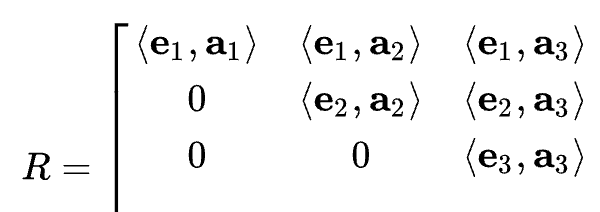

In [32]:
Q = torch.cat([e1.view(-1, 1), e2.view(-1, 1), e3.view(-1, 1)], dim=1)

R = torch.tensor([[torch.dot(e1, an1), torch.dot(e1, an2), torch.dot(e1, an3)],
                  [0, torch.dot(e2, an2), torch.dot(e2, an3)],
                  [0, 0, torch.dot(e3, an3)]
                  ])

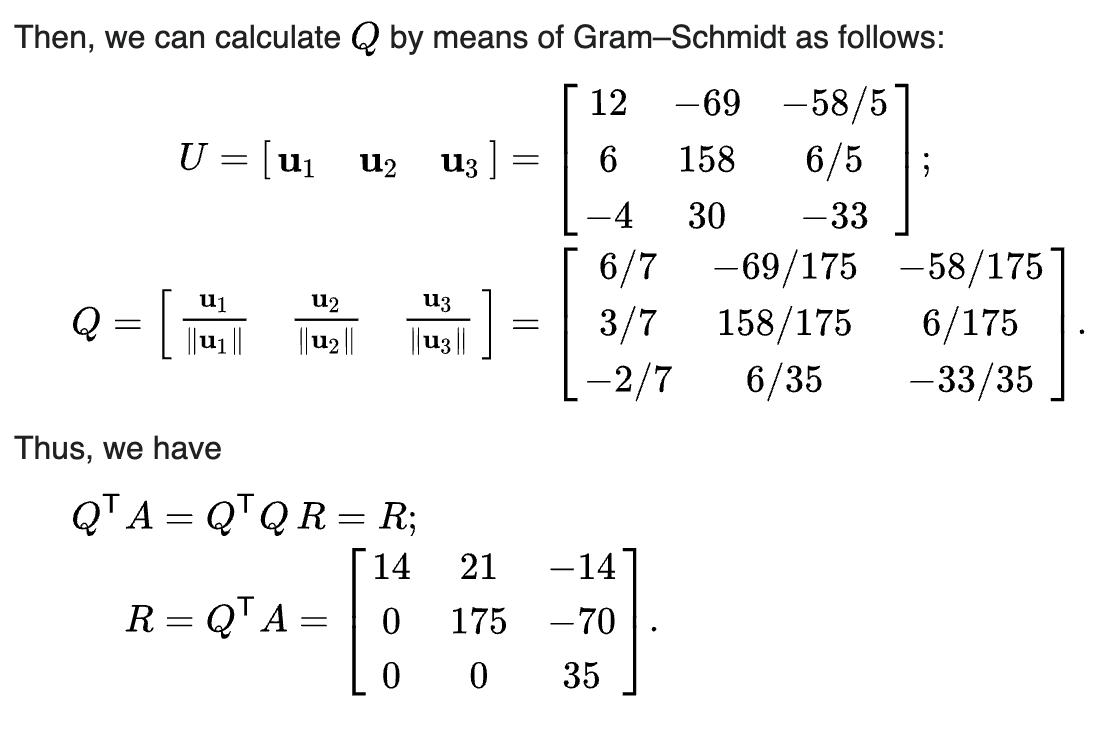

In [ ]:
Q

tensor([[ 0.8571, -0.2894,  0.0503],
        [ 0.4286,  0.9475, -0.8553],
        [-0.2857,  0.1362, -0.5157]])

In [40]:
from fractions import Fraction

[Fraction(x.item()) for x in Q.view(-1)]

[Fraction(14380471, 16777216),
 Fraction(-9709065, 33554432),
 Fraction(13505385, 268435456),
 Fraction(14380471, 33554432),
 Fraction(7948107, 8388608),
 Fraction(-448421, 524288),
 Fraction(-9586981, 33554432),
 Fraction(9137943, 67108864),
 Fraction(-540743, 1048576)]

In [42]:
print(e1)
print(an1)

tensor([ 0.8571,  0.4286, -0.2857])
tensor([12.,  6., -4.])


Option 1: Install in Development Mode (Recommended for testing)

  #From the rthon root directory
  pip uninstall rthon  # Remove PyPI version
  pip install -e .     # Install local development version

Option 4: Publish New Version to PyPI (For wider use)

  If you want to make this available to others:

  1. Update version in pyproject.toml (it's currently 0.3.0)
  2. Build and upload:
  pip install build twine
  python -m build
  python -m twine upload dist/*

  Current State:

  - PyPI version: Only has probability distributions (dnorm, pnorm, etc.)
  - Your local version: Has both distributions AND the new lm() function

  For immediate testing, I recommend Option 1 (development install), which will let you use all the new regression functionality
   we just implemented.

  The import error you're getting is because Python is finding the older PyPI version instead of your enhanced local version
  with the regression module.

In [7]:
import rthon as r

In [2]:
import pandas as pd

In [3]:
gala = pd.read_csv("/Users/samswitz/Desktop/UIUC/Fall 25/STAT-527/gala.csv")

In [4]:
gala.columns = gala.columns.str.lower()
gala.head()

,species,endemics,area,elevation,nearest,scruz,adjacent
0,58,23,25.09,346,0.6,0.6,1.84
1,31,21,1.24,109,0.6,26.3,572.33
2,3,3,0.21,114,2.8,58.7,0.78
3,25,9,0.10,46,1.9,47.4,0.18
4,2,1,0.05,77,1.9,1.9,903.82


In [5]:
gd = gala.to_dict(orient='list')

In [ ]:
model = r.
# summr = model.summary()
print(model.summary())

Linear Regression Results
Formula: species ~ area + elevation + nearest + scruz + adjacent
Observations: 30
Degrees of Freedom: 24

Coefficients:
----------------------------------------------------------------------
                  Estimate Std. Error  t value   Pr(>|t|)
----------------------------------------------------------------------
    (Intercept)   6.891198  72.271795    0.095     0.9240
           area  -0.046234  72.271795   -0.001     0.9995
      elevation   0.367337  72.271795    0.005     0.9959
        nearest  -2.832844  72.271795   -0.039     0.9687
          scruz   0.032710  72.271795    0.000     0.9996
       adjacent  -0.104810  72.271795   -0.001     0.9988
----------------------------------------------------------------------
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 72.2718 on 24 degrees of freedom
Multiple R-squared:  0.6710
Adjusted R-squared:  0.6025
F-statistic: 12.49 on 5 and 24 DF
p-value: 0.0000


In [28]:
import re

sp = "\\."

esc = re.escape(sp)

re.sub(esc, "", summr)

"Linear Regression Results\\n==================================================\\nFormula: species ~ area + elevation + nearest + scruz + adjacent\\nObservations: 30\\nDegrees of Freedom: 24\\n\\nCoefficients:\\n----------------------------------------------------------------------\\n                  Estimate Std. Error  t value   Pr(>|t|)\\n----------------------------------------------------------------------\\n    (Intercept)   6.891198  72.271795    0.095     0.9240\\n           area  -0.046234  72.271795   -0.001     0.9995\\n      elevation   0.367337  72.271795    0.005     0.9959\\n        nearest  -2.832844  72.271795   -0.039     0.9687\\n          scruz   0.032710  72.271795    0.000     0.9996\\n       adjacent  -0.104810  72.271795   -0.001     0.9988\\n----------------------------------------------------------------------\\nSignif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1\\n\\nResidual standard error: 72.2718 on 24 degrees of freedom\\nMultiple R-squared:  

In [13]:
data = {"mpg": [21, 22, 18, 20], "hp": [110, 95, 150, 130], "wt": [2.5, 2.3, 3.2, 3.1]}
model = lm("mpg ~ hp + wt", data=data)
print(f"R² = {model.r_squared:.4f}")

R² = -122.1879


## QR Decomp

residuals: $$ r=y-X\hat{\beta} $$

## Cats

In [8]:
cats = pd.read_csv("/Users/samswitz/Desktop/UIUC/Fall 25/STAT-527/cats.csv")

In [10]:
ct = cats.to_dict(orient='list')

In [12]:
mod = lm("Hwt ~ Bwt", data=ct)
print(mod.summary())

Linear Regression Results
Formula: Hwt ~ Bwt
Observations: 144
Degrees of Freedom: 142

Coefficients:
----------------------------------------------------------------------
                  Estimate Std. Error  t value   Pr(>|t|)
----------------------------------------------------------------------
    (Intercept)  12.474889   2.716373    4.592 4.38e-06 ***
            Bwt  -0.679341   2.716373   -0.250     0.8025
----------------------------------------------------------------------
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.7164 on 142 degrees of freedom
Multiple R-squared:  -0.2361
Adjusted R-squared:  -0.2448
F-statistic: 2.11 on 1 and 142 DF
p-value: 0.0500


In [4]:
import tiktoken

encoding = tiktoken.get_encoding("o200k_base")

token_ids = [64659, 123310, 75584, 8138, 38271] # Example token IDs
decoded_text = encoding.decode(token_ids)
print(decoded_text)
# encoding.decode([75584])

listenlabs.ai/puzzle


In [8]:
!pip install -e .

Obtaining file:///Users/samswitz/GitHub/rthon
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for rthon (pyproject.toml) ... done
  Created wheel for rthon: filename=rthon-0.4.0-0.editable-cp310-cp310-macosx_11_0_arm64.whl size=3238 sha256=39ac80841430384e5dab9c5ff46af4168f9c07a9043580a2b8db265d9f55bff3
  Stored in directory: /private/var/folders/cv/g8dv5_b52gbgs1s_0p35wrx40000gn/T/pip-ephem-wheel-cache-z4mod88d/wheels/2d/d0/dd/abed0394692e6e605fe45c141f167b185c46d1217054405f54
Successfully built rthon
  Attempting uninstall: rthon
    Found existing installation: rthon 0.4.0
    Uninstalling rthon-0.4.0:
      Successfully uninstalled rthon-0.4.0


In [9]:
import pandas as pd
import rthon as r

In [11]:
!pip show rthon

Name: rthon
Version: 0.4.0
Summary: R-style probability functions for Python with high-performance C linear regression
Home-page: https://github.com/sdswitz/rthon
Author: 
Author-email: Sam Switz <samuel76@illinois.edu>
License: MIT
Location: /Users/samswitz/miniforge3/lib/python3.10/site-packages
Editable project location: /Users/samswitz/GitHub/rthon
Requires: numpy
Required-by: 


In [29]:
df = pd.read_csv("/Users/samswitz/Desktop/UIUC/Fall 25/STAT-527/prostate.csv")
data = df.to_dict(orient='list')
# mod = r.lm("lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45", data=data)

y = df.lpsa.values.tolist()
X = df.iloc[:,:8].values.tolist()
# list(X)

In [30]:
mod = r.lm(X, y=y)
print(mod.summary())

Linear Regression Results
Observations: 97
Degrees of Freedom: 89

Coefficients:
----------------------------------------------------------------------
                  Estimate Std. Error  t value   Pr(>|t|)
----------------------------------------------------------------------
             X1   0.578317   1.000000    0.578     0.5630
             X2   0.495798   1.000000    0.496     0.6200
             X3  -0.017545   1.000000   -0.018     0.9860
             X4   0.096893   1.000000    0.097     0.9228
             X5   0.774058   1.000000    0.774     0.4389
             X6  -0.107667   1.000000   -0.108     0.9143
             X7   0.107398   1.000000    0.107     0.9145
             X8   0.003415   1.000000    0.003     0.9973
----------------------------------------------------------------------
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7055 on 89 degrees of freedom
Multiple R-squared:  0.6537
Adjusted R-squared:  0.6265
F-stati

In [12]:
r.lm_info()

{'implementation': 'C (high-performance)',
 'module': 'rthon.regression._c_ext',
 'available': True,
 'performance': '~10-100x faster than Python'}